<a href="https://colab.research.google.com/github/VitaliyYasnitskiy/-/blob/main/%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4%D0%B0_04_01_2021_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Модуль №1 (Обучающее, валидационное множество.Загрузка данных из файла Values.xlsx)
 from google.colab import files

 uploaded = files.upload()

import pandas as pd
xls = pd.ExcelFile("Values.xlsx")

sheetX=xls.parse(sheetname=0,index_col=None,usecols=None)

X=sheetX
D1=sheetX['D1']
X1=sheetX['X1']
X2=sheetX['X2']
X3=sheetX['X3']
X4=sheetX['X4']
X5=sheetX['X5']
X6=sheetX['X6']
X7=sheetX['X7']

Saving Values.xlsx to Values.xlsx


In [ ]:
# создаем новый excel-файл для выгрузки прогнозных значений
import openpyxl

# создаем новый excel-файл
wb = openpyxl.Workbook()

# добавляем новый лист
wb.create_sheet(title = 'Прогноз', index = 0)

# получаем лист, с которым будем работать
sheet = wb['Прогноз']

Epoch 1/30
92/92 - 1s - loss: 0.8000 - accuracy: 0.8357 - val_loss: 0.6585 - val_accuracy: 0.8200
Epoch 2/30
92/92 - 0s - loss: 0.5052 - accuracy: 0.8727 - val_loss: 0.5396 - val_accuracy: 0.8900
Epoch 3/30
92/92 - 0s - loss: 0.4247 - accuracy: 0.8857 - val_loss: 0.4843 - val_accuracy: 0.8700
Epoch 4/30
92/92 - 0s - loss: 0.3948 - accuracy: 0.8814 - val_loss: 0.4494 - val_accuracy: 0.8900
Epoch 5/30
92/92 - 0s - loss: 0.3659 - accuracy: 0.8934 - val_loss: 0.4069 - val_accuracy: 0.8900
Epoch 6/30
92/92 - 0s - loss: 0.3805 - accuracy: 0.8879 - val_loss: 0.3756 - val_accuracy: 0.8900
Epoch 7/30
92/92 - 0s - loss: 0.3436 - accuracy: 0.8934 - val_loss: 0.3644 - val_accuracy: 0.8900
Epoch 8/30
92/92 - 0s - loss: 0.3368 - accuracy: 0.8934 - val_loss: 0.3549 - val_accuracy: 0.8900
Epoch 9/30
92/92 - 0s - loss: 0.3379 - accuracy: 0.8955 - val_loss: 0.3544 - val_accuracy: 0.8900
Epoch 10/30
92/92 - 0s - loss: 0.3405 - accuracy: 0.8966 - val_loss: 0.3478 - val_accuracy: 0.8900
Epoch 11/30
92/92 -

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


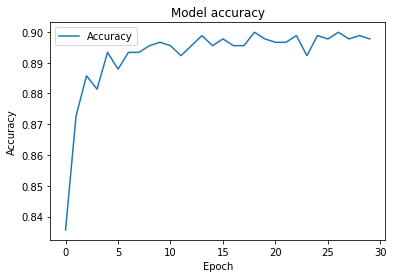

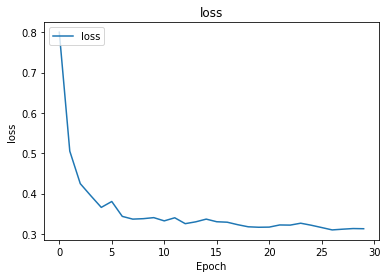

In [ ]:
#Нейронная сеть для завода (http://zabaykin.ru/?p=490)

from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt # For plotting

#Массив для обучения (919 строк):
All_train = sheetX.iloc[0:919,]
X_train = sheetX.iloc[0:919:,0:15]
Y_train = sheetX.iloc[0:919:,15]

# Зарезервируем 100 примеров для валидации
All_val = sheetX.iloc[-100:,]
X_val = sheetX.iloc[-100:,0:15]
Y_val = sheetX.iloc[-100:,15]

# Создаём модель!
model = Sequential()
# Добавляем первый слой Dense, первое число 12 - это количество нейронов, 
# input_dim - количество фич на вход
# activation -  функция активации, полулинейная функция max(x, 0) 
# именно полулинейные функции позволяют получать нелинейные результаты с минимальными затратами
#model.add(Dense(12, input_dim=16, activation='relu')) #- работало 31.12.2020
model.add(Dense(15, input_dim=15, activation='relu')) #- изменено 01.01.2021
# добавляем второй слой с 8ю нейронами
model.add(Dense(8, activation='relu')) #- работало 31.12.2020
#model.add(Dense(7, activation='relu'))
#model.add(Dense(8, activation='relu'))   #- изменено 01.01.2021

model.add(Dense(1, activation='sigmoid')) #  выходной слой

# на выходе при бинарной классификации, функцию активации чаще всего используют sigmoid , реже softmax
# Компилирование модели. binary_crossentropy - опять же не случайно, а т.к. у нас два класса.
# Метрика accuracy используется практически для всех задач классификации
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X=sheetX #- это работало 31.12.2020
Y=sheetX['D1'] # - это работало 31.12.2020
# Первые 8 столбцов в примере отвечают за параметры, последний за класс, разбиваем 

# Наконец дошли до обучения модели, X и Y 
# epoch - максимальное количество эпох до остановки
# batch_size - сколько объектов будет загружаться за итерацию
#model.fit(X_train, Y_train, epochs=30, batch_size=10,  verbose=2, callbacks=[TQDMNotebookCallback()])
history = model.fit(X_train, Y_train, epochs=30, batch_size=10,  verbose=2, validation_data = (X_val, Y_val))

print(history.history.keys())

# Предсказание
predictions = model.predict(X_val)


#print("predictions")
#print(predictions)

#сохранение данных прогноза в файл:
for num in range(100):
      predval = predictions[num]
      
      cell = sheet.cell(row = num+1, column = 1)  
      cell.value = float(predval)

# Save the result
wb.save('predict.xlsx')

from google.colab import files
files.download("predict.xlsx")



model.summary() #выводит парметры структуры нейронной сети

#history.validation_data['accuracy']
#print(history.history['val_loss'])
#print(history.history['accuracy'])

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
#plt.plot(history.history['val_accuracy'])
#val_accuracy
#print (history_dict.keys ())
#plt.title('Model accuracy Train')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Accuracy', 'loss'], loc='upper left')
#plt.show()



plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'Test'], loc='upper left')
plt.show()

In [ ]:
#Пробуем еще одну нейронную сеть
	
#pip install h5py
#from keras.callbacks import ModelCheckpoint
#weights_file = "weights.hdf5"
#checkpoint = ModelCheckpoint(weights_file, monitor='acc', mode='max', save_best_only=True, verbose=1)
#model.fit(..., callbacks=[checkpoint])

#model.fit(..., callbacks=[checkpoint])

import numpy as np
import pandas as pd
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import train_test_split - устаревший метод
 
# random seed
seed = 101
np.random.seed(seed)
 
# load and split data
dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset = dataframe.values
X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4]
 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
 
# one-hot
dummy_y = np_utils.to_categorical(encoded_Y)
 
# split to test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=.25, random_state=seed)
 
# define model
def my_model():
    model = Sequential()
    model.add(Dense(4, input_dim=4, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
# save weights
weights_file = "weights.hdf5"
checkpoint = ModelCheckpoint(weights_file, monitor='acc', mode='max', save_best_only=True, verbose=1)
 
# fit
model = my_model()
model.fit(X_train, Y_train, batch_size=7, nb_epoch=200, verbose=1, callbacks=[checkpoint])
 
# save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#
#
#
 
# load model
jfile = open("model.json", "r")
loaded_json = jfile.read()
jfile.close()
loaded_model = model_from_json(loaded_json)
 
# weights
loaded_model.load_weights("weights.hdf5")
 
# compile model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
# predict
predictions = loaded_model.predict_proba(X_test)
print('Accuracy: {}'.format(roc_auc_score(y_true=Y_test, y_score=predictions)))


Задача XOR с GitHub
https://github.com/Frixoe/xor-neural-network/blob/master/XOR-Net-Notebook.ipynb

Iteration: 5000 and 4

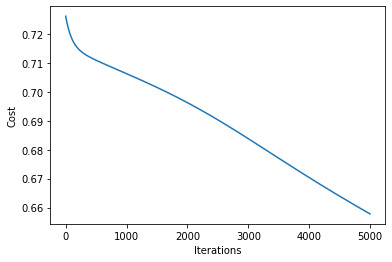

In [ ]:


import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

X
y

num_i_units = 2 # Number of Input units
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 5000

# Number of training examples
m = 4

np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

W1
W2
B1
B2

def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))


def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

    
W1, W2, B1, B2 = train(W1, W2, B1, B2)


W1

W2

B1

B2

# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()